# Expected Signature Estimation

## Brownian motion
We verify empirically the central limit theorem for the estimator of the expected signature of Brownian motion. Given $N$ i.i.d. uniformly-spaced discrete observations of Brownian motion in $\mathbb{R}^d$ over $[0,T]$ with step-size $\dfrac{T}{M}$, denoted by $\{\hat{B}^{n, M}_{[0,T]}\}_{n=1}^N$, we estimate 
$$\phi(T):= \mathbb{E}[S(B_{[0,T]})],$$
by
$$ \phi^{N, M}(T) := \frac{1}{N} \sum_{n=1}^N S\left(\hat{B}^{n, M}_{[0,T]}\right).$$
Let $I = (i_1, \ldots, i_{k})$ denote a word of length $k$ and $\pi_{I}: T((\mathbb{R}^d)) \mapsto \mathbb{R}$ the projection operator then we have the following CLT:
$$ \frac{\sqrt{N}}{\sigma_{I, M}} \left( \pi_I\left(\phi^{N, M}(T)\right) - \pi_I\left(\phi(T)\right) \right) \overset{d}{\rightarrow} \mathcal{N}(0, 1),$$
as $N, M\rightarrow \infty$. If $|I|\in\{4, 6, 8, \ldots\}$ we require $\sqrt{N} / M \rightarrow 0$. Here
$$\sigma^2_{I, M} = (\pi_I ⧢ \pi_I)(\phi^M(T)) - \left(\pi_I(\phi^M(T))\right)^2,$$
with 
$$\phi^M(T) = \left(\sum_{n=0}^\infty \sum_{K\in\mathcal{K}_{2n}} \frac{C_K}{n!} \left(\frac{T}{2M}\right)^n e_{i_1} \otimes \cdots \otimes e_{i_{2n}}\right)^{\otimes M},$$
and 
$$\displaystyle C_I = {n \choose \frac{n_1(I)}{2},\ldots, \frac{n_d(I)}{2}} \bigg/ {2n \choose n_1(I),\ldots,n_d(I)},$$
$$\displaystyle \mathcal{K}_{2n} = \left\{I = (i_1, \ldots, i_{2n}) : n_j(I) \text{ even } \forall j\in\{1, \ldots, d\}\right\},$$
$$\displaystyle n_j(I) = \#\{k\in\{1,\ldots, |I|\}: i_k = j \}.$$

To compute $\pi_I(\phi^M(T))$ for a word $I$ note that we can project $\phi^M(T)$ on $(\mathbb{R}^d)^{\otimes |I|}$:
$$\rho_{|I|}\left(\phi^M(T)\right) = \sum_{\substack{j_1,\ldots, j_M \geq 0\\ j_1 + \ldots + j_M = \frac{|I|}{2}}}\, \bigotimes_{m=1}^M \, \sum_{I\in\mathcal{K}_{2j_m}} \frac{C_I}{j_m!} \left(\frac{T}{2M}\right)^{j_m} e_{i_1} \otimes \cdots \otimes e_{i_{2j_m}},$$
where $\rho_{|I|}:T((\mathbb{R}^d)) \mapsto (\mathbb{R}^d)^{\otimes |I|}$.

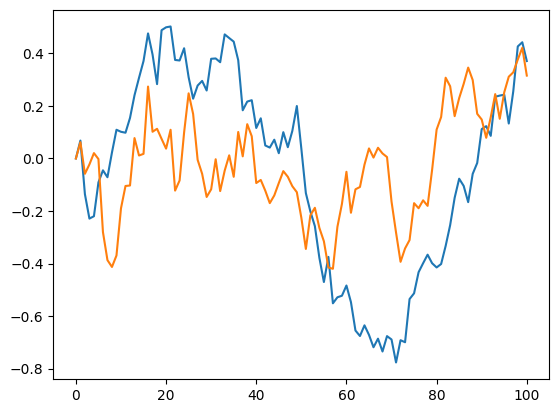

In [1]:
import matplotlib.pyplot as plt
from lib.data.generate import generate_BM
import numpy as np

X = generate_BM(batch=100, length=100, channels=2, T=1)
plt.plot(X[0, :, :])
plt.show()

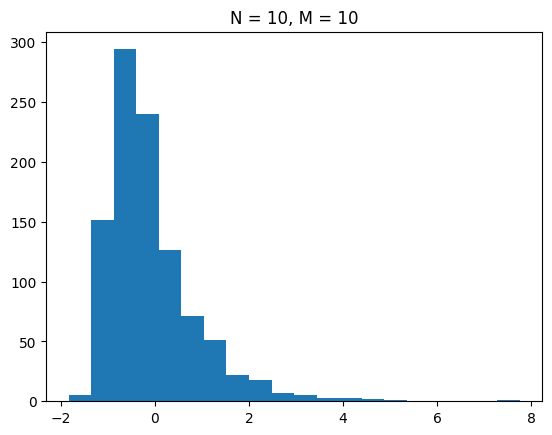

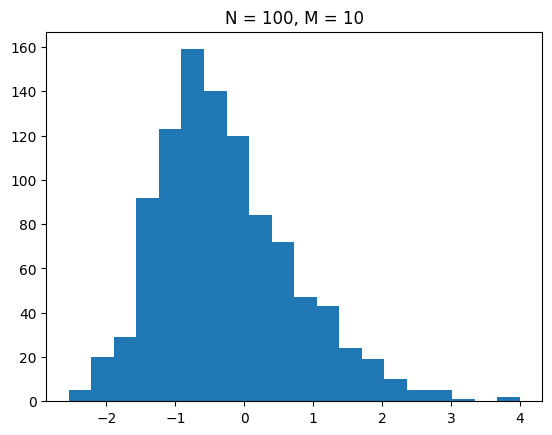

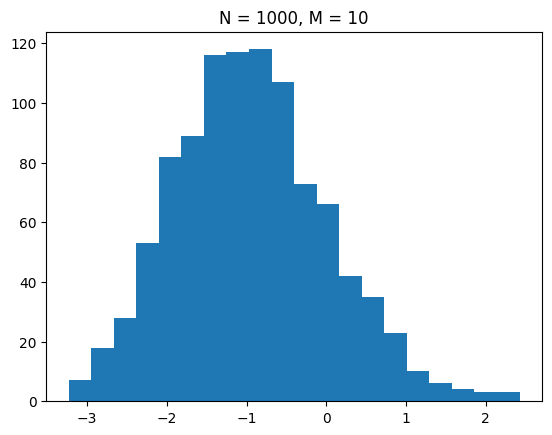

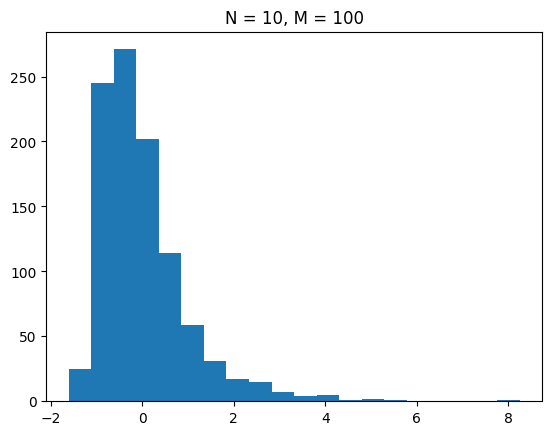

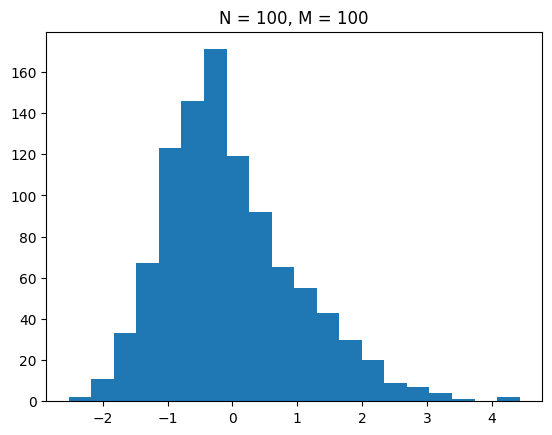

In [ ]:
#TODO: Cache everything to make even faster :)
from lib.exact_values.brownian_motion.esig import expected_signature_BM, var_estimator
from lib.esig import expected_signature_estimate
from lib.utils import sig_word_to_idx

Ms = [10, 100]
Ns = [10, 100, 1000]
size = 1000
d = 2
T = 1
I = (1, 1, 0, 0)
variances = {}
X = generate_BM(batch=max(Ns)*size, length=max(Ms), channels=d, T=T)
for M in Ms:
    variances[M] = var_estimator(I=I, M=None, T=T, d=d) # note can compare "exact" and approx variance
    for N in Ns:
        X_ = X[:N*size, ::(max(Ms)//M), :].reshape((size, N, -1, d))
        estimate = expected_signature_estimate(X_, depth=len(I))[:, sig_word_to_idx(I, dim=d)]
        Z = np.sqrt(N / variances[M]) * (estimate - expected_signature_BM(j=I, T=T, d=d))
        plt.hist(Z, bins=20)
        plt.title(f"N = {N}, M = {M}")
        plt.show()

## Control variates

### Continuous observations
Assuming access to $N$ independent continuous observations of Brownian motion over $[0,T]$ in $d=1$ we can consider the (unbiased) estimator
$$
 \pi_k(\hat{\phi}^N_T) = \frac{1}{N} \sum_{n=1}^N S^{(k)}(\mathbb{B}^n)_{[0,T]},
$$
for the target parameter
$$
    \pi_k(\phi_T) = \mathbb{E}\left[S^{(k)}(\mathbb{B})_{[0,T]}\right],
$$
where
$$
    S^{(k)}(\mathbb{B})_{[0,T]} := \underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \circ \textrm{d}B_{u_k}.
$$

We can then define the control variate estimator
$$
 \pi_k(\hat{\phi}^{N, c}_T) = \frac{1}{N} \sum_{n=1}^N \left\{S^{(k)}(\mathbb{B}^n)_{[0,T]} + c S_c^{(k)}(\mathbb{B}^n)_{[0,T]}\right\},
$$
where
$$
    S_c^{(k)}(\mathbb{B})_{[0,T]} := \underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \textrm{d}B_{u_k}.
$$
One can verify that this estimator is unbiased
$$
    \mathbb{E}\left[\pi_k(\hat{\phi}^{N, c}_T)\right] = \mathbb{E}\left[\pi_k(\hat{\phi}^{N}_T)\right] = \pi_k(\phi_T),
$$
and, when 
$$
c = - \frac{\text{Cov}\left(S^{(k)}(\mathbb{B})_{[0,T]}, S_c^{(k)}(\mathbb{B})_{[0,T]}\right)}{\text{Var}\left(S_c^{(k)}(\mathbb{B})_{[0,T]}\right)},
$$
has variance 
$$
    \text{Var}\left(\pi_k(\hat{\phi}^{N, c}_T)\right) = (1 - \rho)\text{Var}\left(\pi_k(\hat{\phi}^{N}_T)\right),
$$
where
$$
 \rho = \text{Corr}\left(S^{(k)}(\mathbb{B})_{[0,T]}, S_c^{(k)}(\mathbb{B})_{[0,T]}\right) = \text{Corr}\left(\underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \circ \textrm{d}B_{u_k}, \underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \textrm{d}B_{u_k}\right).
$$


### Discrete observations
Assuming access to $N$ independent discrete observations of Brownian motion over $[0,T]$ with $M$ steps in $d=1$ we can consider the (consistent) estimator
$$
 \pi_k(\hat{\phi}^{N, M}_T) = \frac{1}{N} \sum_{n=1}^N S^{(k)}(\hat{\mathbb{B}}^{n, M})_{[0,T]},
$$
for the target parameter
$$
    \pi_k(\phi_T) = \mathbb{E}\left[S^{(k)}(\mathbb{B})_{[0,T]}\right],
$$
where
$$
    S^{(k)}(\mathbb{B})_{[0,T]} := \underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \circ \textrm{d}B_{u_k}.
$$

We can then define the control variate estimator
$$
 \pi_k(\hat{\phi}^{N, M, c}_T) = \frac{1}{N} \sum_{n=1}^N \left\{S^{(k)}(\hat{\mathbb{B}}^{n, M})_{[0,T]} + c S^{(k)}_c(\hat{\mathbb{B}}^{n, M})_{[0,T]}\right\},
$$
where
$$
    S^{(k)}_c(\hat{\mathbb{B}}^{n, M})_{[0,T]} := \sum_{m=0}^{M-1} \underset{0<u_1<\cdots<u_{k-1}<t_m}{\int\cdots\int} \circ \textrm{d}\hat{B}^M_{u_1} \cdots \circ \textrm{d}\hat{B}^M_{u_{k-1}} (B_{t_{m+1}} - B_{t_m}).
$$
One can verify that this estimator is also consistent (with the same bias as $\pi_k(\hat{\phi}^{N, M}_T)$)
$$
    \mathbb{E}\left[\pi_k(\hat{\phi}^{N, M, c}_T)\right] = \mathbb{E}\left[\pi_k(\hat{\phi}^{N, M}_T)\right],
$$
and, when 
$$
c = - \frac{\text{Cov}\left(S^{(k)}(\hat{\mathbb{B}}^M)_{[0,T]}, S^{(k)}_c(\hat{\mathbb{B}}^M)_{[0,T]}\right)}{\text{Var}\left(S^{(k)}_c(\hat{\mathbb{B}}^M)_{[0,T]}\right)},
$$
has variance 
$$
    \text{Var}\left(\pi_k(\hat{\phi}^{N, M, c}_T)\right) = (1 - \rho)\text{Var}\left(\pi_k(\hat{\phi}^{N, M}_T)\right),
$$
where
$$
 \rho = \text{Corr}\left(S^{(k)}(\hat{\mathbb{B}}^M)_{[0,T]}, S^{(k)}_c(\hat{\mathbb{B}}^M)_{[0,T]}\right) = \text{Corr}\left(\underset{0<u_1<\cdots<u_n<T}{\int\cdots\int} \circ \textrm{d}\hat{B}^M_{u_1} \cdots \circ \textrm{d}\hat{B}^M_{u_{n-1}} \circ \textrm{d}\hat{B}^M_{u_n},\ \sum_{m=0}^{M-1} \underset{0<u_1<\cdots<u_{n-1}<t_m}{\int\cdots\int} \circ \textrm{d}\hat{B}^M_{u_1} \cdots \circ \textrm{d}\hat{B}^M_{u_{n-1}} (B_{t_{m+1}} - B_{t_m}) \right).
$$

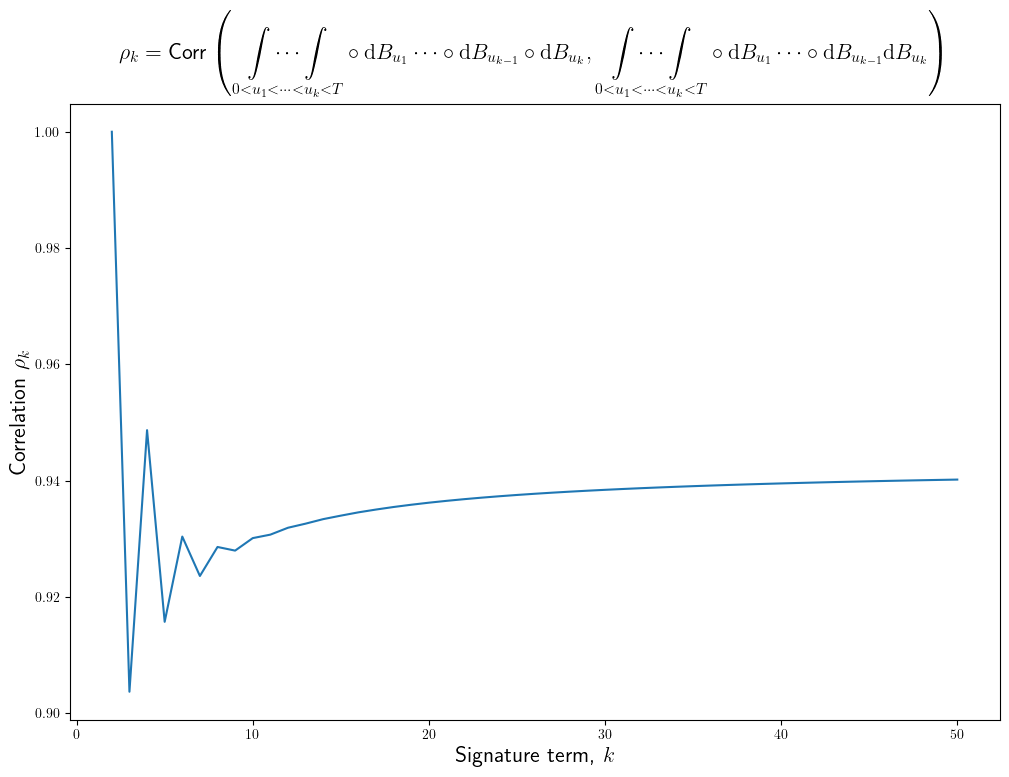

In [16]:
import matplotlib.pyplot as plt
import math
import numpy as np

from lib.exact_values.brownian_motion.martingale_correction import corr_strat_control

d = 1
T = 1
levels = range(2, 51)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.figure(figsize=(12,8))
plt.plot(
    levels,
    [corr_strat_control(level, T) for level in levels],
    color = 'tab:blue',
)
# weak lower bound
# plt.scatter(
#     levels,
#     [loose_lower_bound_corr(level) for level in levels],
#     color='tab:red',
#     s = 10,
#     label = 'loose lower bound'
# )
plt.title(r'$\rho_k = \displaystyle\text{Corr}\left(\underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \circ \textrm{d}B_{u_k}, \underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \circ \textrm{d}B_{u_1} \cdots \circ \textrm{d}B_{u_{k-1}} \textrm{d}B_{u_{k}}\right)$', size=16, usetex=True, y=1.06)
# plt.ylim(0, 1)
plt.ylabel('Correlation $\\rho_k$', size=16)
plt.xlabel(r'Signature term, $k$', size=16)
# plt.legend()
plt.show()

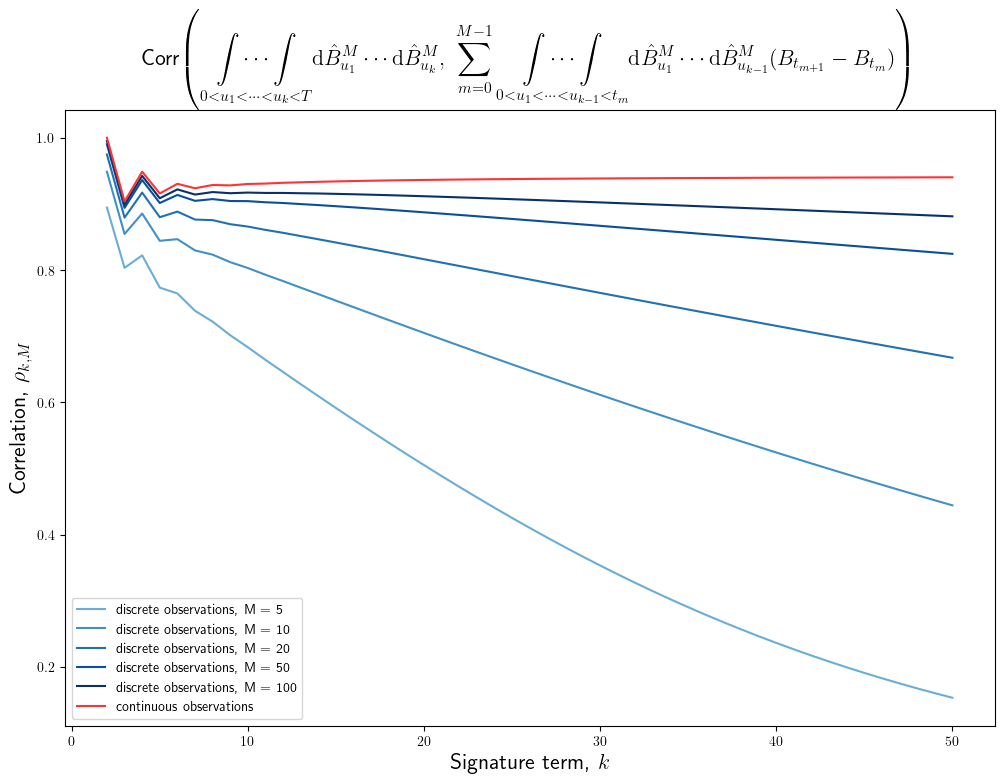

In [17]:
Ms = [5, 10, 20, 50, 100, None]

colors = plt.cm.Blues(np.linspace(0.5, 1, len(Ms) - 1))
colors = np.concatenate([colors, np.array([[1, 0.2, 0.2, 1]])], axis=0)

plt.figure(figsize=(12,8))
for i, M in enumerate(Ms): 
    plt.plot(
        levels,
        [corr_strat_control(level, T, M) for level in levels],
        label = f"discrete observations, M = {M}" if isinstance(M, int) else "continuous observations",
        color = colors[i]
    )
plt.title(r'Corr$\displaystyle \left(\underset{0<u_1<\cdots<u_k<T}{\int\cdots\int} \textrm{d}\hat{B}^M_{u_1} \cdots \textrm{d}\hat{B}^M_{u_k},\ \sum_{m=0}^{M-1} \underset{0<u_1<\cdots<u_{k-1}<t_m}{\int\cdots\int} \textrm{d}\hat{B}^M_{u_1} \cdots \textrm{d}\hat{B}^M_{u_{k-1}} (B_{t_{m+1}} - B_{t_m}) \right)$', size=16, usetex=True)
plt.ylabel('Correlation, $\\rho_{k, M}$', size=16)
plt.xlabel(r'Signature term, $k$', size=16)
plt.legend()
# plt.ylim(0, 1)
plt.show()

## Old GP proof

In [31]:
def all_parirings(l):
    if len(l) == 0 or len(l) % 2 == 1:
        return []
    elif len(l) == 2:
        return [[(l[0], l[1])]]
    else:
        pairings = []
        for i in range(1, len(l)):
            k = l.copy()
            del k[i], k[0]
            sub_pairings = all_parirings(k)
            if len(sub_pairings) != 0:
                for subpairing in sub_pairings:
                    pairings.append([(l[0], l[i]), ] + subpairing)
        return pairings

In [39]:
all_parirings([(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3)])

[[((0, 1), (0, 2)), ((0, 3), (1, 1)), ((1, 2), (1, 3))],
 [((0, 1), (0, 2)), ((0, 3), (1, 2)), ((1, 1), (1, 3))],
 [((0, 1), (0, 2)), ((0, 3), (1, 3)), ((1, 1), (1, 2))],
 [((0, 1), (0, 3)), ((0, 2), (1, 1)), ((1, 2), (1, 3))],
 [((0, 1), (0, 3)), ((0, 2), (1, 2)), ((1, 1), (1, 3))],
 [((0, 1), (0, 3)), ((0, 2), (1, 3)), ((1, 1), (1, 2))],
 [((0, 1), (1, 1)), ((0, 2), (0, 3)), ((1, 2), (1, 3))],
 [((0, 1), (1, 1)), ((0, 2), (1, 2)), ((0, 3), (1, 3))],
 [((0, 1), (1, 1)), ((0, 2), (1, 3)), ((0, 3), (1, 2))],
 [((0, 1), (1, 2)), ((0, 2), (0, 3)), ((1, 1), (1, 3))],
 [((0, 1), (1, 2)), ((0, 2), (1, 1)), ((0, 3), (1, 3))],
 [((0, 1), (1, 2)), ((0, 2), (1, 3)), ((0, 3), (1, 1))],
 [((0, 1), (1, 3)), ((0, 2), (0, 3)), ((1, 1), (1, 2))],
 [((0, 1), (1, 3)), ((0, 2), (1, 1)), ((0, 3), (1, 2))],
 [((0, 1), (1, 3)), ((0, 2), (1, 2)), ((0, 3), (1, 1))]]

In [38]:
all_parirings([(0, 1), (0, 2), (0, 3), (0, 4)])

[[((0, 1), (0, 2)), ((0, 3), (0, 4))],
 [((0, 1), (0, 3)), ((0, 2), (0, 4))],
 [((0, 1), (0, 4)), ((0, 2), (0, 3))]]

In [37]:
all_parirings([(1, 1), (1, 2), (1, 3), (1, 4)])

[[((1, 1), (1, 2)), ((1, 3), (1, 4))],
 [((1, 1), (1, 3)), ((1, 2), (1, 4))],
 [((1, 1), (1, 4)), ((1, 2), (1, 3))]]

## The ergodic assumption

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ll1917\AppData\Local\Temp\ipykernel_19288\19554653.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


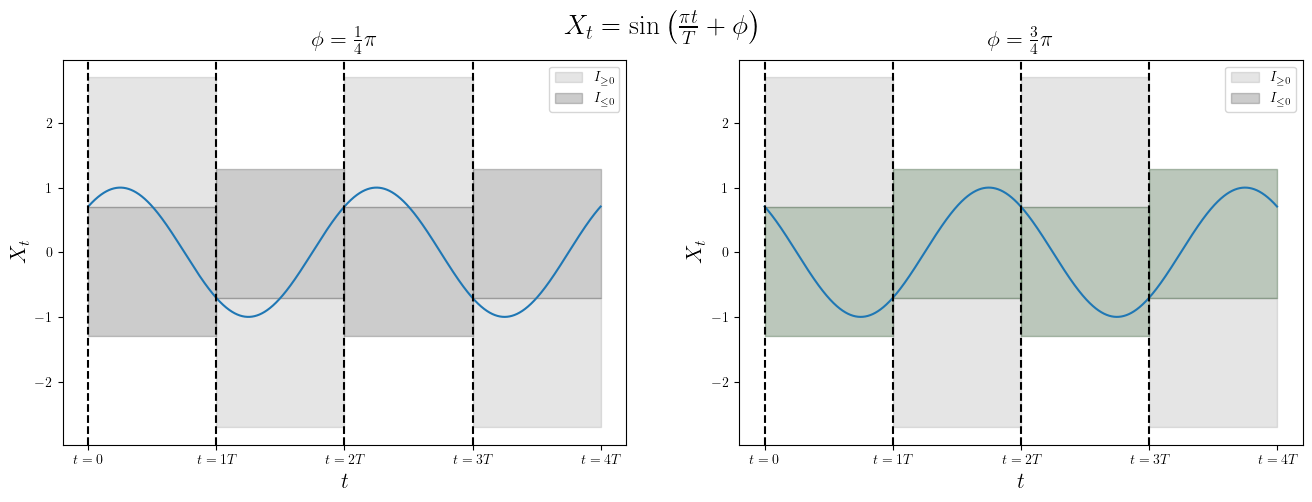

In [72]:
phi_fracs = [1/4, 3/4]
T = 1 
N = 4
granularity = 1000
time = np.linspace(0, N*T, N*T*granularity+1)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

fig, axes = plt.subplots(ncols = len(phi_fracs), figsize = (8*len(phi_fracs), 5))

for i, phi_frac in enumerate(phi_fracs):
    ax = axes[i]
    X = np.sin(np.pi*time/T + phi_frac*np.pi)

    ax.plot(
        time,
        X,
        color = 'tab:blue',
    )
    for n in range(N):
        ax.axvline(x=n*T, color='black', linestyle='--')
        x_start = X[n*T*granularity]
        ax.fill_between([n*T, (n+1)*T], x_start, x_start+2*(-1)**(n), color='black', alpha=0.1, label=r'$I_{\geq 0}$' if n == 0 else None)
        ax.fill_between([n*T, (n+1)*T], x_start, x_start+2*(-1)**(n+1), color='black', alpha=0.2, label=r'$I_{\leq 0}$' if n == 0 else None)
        if all(X[n*T*granularity:(n+1)*T*granularity] >= x_start):
            ax.fill_between([n*T, (n+1)*T], x_start, x_start+2, color='tab:green', alpha=0.1)
        elif all(X[n*T*granularity:(n+1)*T*granularity] <= x_start):
            ax.fill_between([n*T, (n+1)*T], x_start, x_start-2, color='tab:green', alpha=0.1)

    ax.set_xticks([n*T for n in range(N+1)])
    ax.set_xticklabels([f'$t={n}$' if n==0 else f'$t={n}T$' for n in range(N+1)])

    ax.set_ylabel(r'$X_t$', size=16, usetex=True)
    ax.set_xlabel(r'$t$', size=16)
    ax.legend()

    ax.set_title(fr'$\phi = \frac{{{int(phi_frac*4)}}}{{4}} \pi$', size=16, usetex=True, pad=10)

fig.suptitle(r'$X_t = \sin\left(\frac{\pi t}{T} + \phi \right)$', size=20, usetex=True)
fig.show()
